# FordGoBike 2018FY

##### by Milind Singh

## Table of Contents
<ol>
    <li><a href="#Introduction">Introduction</a></li>
    <li><a href="#Gathering Data">Gathering Data</a></li>
    <li><a href="#Assessing Data">Assessing Data</a></li>
    <li><a href="#Cleaning Data">Cleaning Data</a></li>
    <li><a href="#Univariate Exploration">Univariate Exploration</a></li>
    <li><a href="#Bivariate Exploration">Bivariate Exploration</a></li>
    <li><a href="#Multivariate Exploration">Multivariate Exploration</a></li>
    <li><a href="#Conclusions">Conclusions</a></li>
</ol>

<a id='Introduction'></a>
# Introduction

> Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

>The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

<a id='Gathering Data'></a>
# 1 . Gathering Data

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import glob
import os

%matplotlib inline

In [33]:
path = r'C:\Users\Milind\Documents\Nanodegree\Data Analyst\Assignment 5\fordgobike'
files = glob.glob(os.path.join(path, "*.csv"))


In [34]:
df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)
df.to_csv('fordgo_master.csv', index = False)

In [35]:
master = pd.read_csv('fordgo_master.csv')

<a id='Assessing Data'></a>
# 2. Assessing Data

In [38]:
#Checking data
master.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
1744899,330,2018-12-27 18:28:20.0040,2018-12-27 18:33:50.7060,19.0,Post St at Kearny St,37.788975,-122.403452,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,5561,Subscriber,No
146113,396,2018-02-14 09:26:57.2880,2018-02-14 09:33:33.7370,173.0,Shattuck Ave at 55th Ave,37.840364,-122.264488,176.0,MacArthur BART Station,37.828410,-122.266315,1037,Customer,No
254169,2327,2018-03-18 21:34:16.4140,2018-03-18 22:13:03.9890,176.0,MacArthur BART Station,37.828410,-122.266315,176.0,MacArthur BART Station,37.828410,-122.266315,300,Customer,No
446642,696,2018-05-31 17:07:46.1540,2018-05-31 17:19:23.0190,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,49.0,S Park St at 3rd St,37.780760,-122.394989,526,Subscriber,No
1733023,1372,2018-12-31 17:10:38.5310,2018-12-31 17:33:30.6980,19.0,Post St at Kearny St,37.788975,-122.403452,133.0,Valencia St at 22nd St,37.755213,-122.420975,4744,Subscriber,No
961684,322,2018-07-10 18:31:32.3210,2018-07-10 18:36:55.0950,242.0,Milvia St at Derby St,37.860125,-122.269384,274.0,Oregon St at Adeline St,37.857567,-122.267558,1512,Subscriber,No
649397,1638,2018-06-27 08:18:22.3190,2018-06-27 08:45:40.5740,145.0,29th St at Church St,37.743684,-122.426806,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,2929,Subscriber,No
545230,413,2018-05-14 16:17:34.3580,2018-05-14 16:24:27.7810,218.0,DeFremery Park,37.812331,-122.285171,160.0,West Oakland BART Station,37.805318,-122.294837,167,Subscriber,No
674907,577,2018-06-23 11:54:41.7970,2018-06-23 12:04:19.3490,127.0,Valencia St at 21st St,37.756708,-122.421025,58.0,Market St at 10th St,37.776619,-122.417385,2728,Subscriber,No
468636,393,2018-05-27 22:11:51.1860,2018-05-27 22:18:24.2690,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,425,Subscriber,No


In [39]:
#Snapshot of data information
master.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1863721 non-null  int64  
 1   start_time               1863721 non-null  object 
 2   end_time                 1863721 non-null  object 
 3   start_station_id         1851950 non-null  float64
 4   start_station_name       1851950 non-null  object 
 5   start_station_latitude   1863721 non-null  float64
 6   start_station_longitude  1863721 non-null  float64
 7   end_station_id           1851950 non-null  float64
 8   end_station_name         1851950 non-null  object 
 9   end_station_latitude     1863721 non-null  float64
 10  end_station_longitude    1863721 non-null  float64
 11  bike_id                  1863721 non-null  int64  
 12  user_type                1863721 non-null  object 
 13  bike_share_for_all_trip  1863721 non-null 

In [41]:
#checking is there any duplicate file existed
master.duplicated().sum()

0

#### Quality and tidiness Issue
 
 * start time and end time are objects not a timestamps
 
 * user type and bike_share_for_all_trip can be set to category
 
 * bike id, start_station_id, end_station_id can be set to object
 
 * There are missing values throughout the dataset (start_station_id, start_station_name, end_station_id, end_station_name)
 
 * we can further enhance the dataset with more details about the time like month, day, hour, weekday
 
 * we can calculate the distance for rides between stations
 

<a id='Cleaning Data'></a>
# 3. Cleaning Data

In [42]:
#creating copy of original master dataset
df_clean = master.copy()

##### Set dates to timestamps

In [43]:
# set dates to timestamps
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

##### Set user type and bike_share_for_all_trip to category

In [44]:
# set user type and bike_share_for_all_trip to category
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

##### Set bike id, start_station_id, end_station_id to object

In [45]:
# set bike id, start_station_id, end_station_id to object
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.bike_id.astype(str)

In [46]:
#test
df_clean.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1863721 non-null  int64         
 1   start_time               1863721 non-null  datetime64[ns]
 2   end_time                 1863721 non-null  datetime64[ns]
 3   start_station_id         1863721 non-null  object        
 4   start_station_name       1851950 non-null  object        
 5   start_station_latitude   1863721 non-null  float64       
 6   start_station_longitude  1863721 non-null  float64       
 7   end_station_id           1863721 non-null  object        
 8   end_station_name         1851950 non-null  object        
 9   end_station_latitude     1863721 non-null  float64       
 10  end_station_longitude    1863721 non-null  float64       
 11  bike_id                  1863721 non-null  object        
 12  

##### Adding columns for the start month, day of the week, and hour, along with figuring out the trip duration in minutes, for my visuals

In [48]:
# Start time month (January - December)
df_clean['start_time_month'] = df_clean['start_time'].dt.strftime('%B')

In [50]:
# Start time month (1-12)
df_clean['start_time_month_num'] = df_clean['start_time'].dt.month.astype(int)

In [51]:
# Start time weekday
df_clean['start_time_weekday'] = df_clean['start_time'].dt.strftime('%a')

In [52]:
# Start and end time hour
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour
df_clean['end_time_hour'] = df_clean['end_time'].dt.hour

In [53]:
# Duration in seconds to duration in minutes
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean['duration_min'] = df_clean['duration_min'].astype(int)

In [64]:
df_clean.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 20 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1863721 non-null  int64         
 1   start_time               1863721 non-null  datetime64[ns]
 2   end_time                 1863721 non-null  datetime64[ns]
 3   start_station_id         1863721 non-null  object        
 4   start_station_name       1851950 non-null  object        
 5   start_station_latitude   1863721 non-null  float64       
 6   start_station_longitude  1863721 non-null  float64       
 7   end_station_id           1863721 non-null  object        
 8   end_station_name         1851950 non-null  object        
 9   end_station_latitude     1863721 non-null  float64       
 10  end_station_longitude    1863721 non-null  float64       
 11  bike_id                  1863721 non-null  object        
 12  

##### Calculating the total distance traveled using the latitude and longitude in the data set.

In [65]:
import math
from math import radians, sin, cos, acos

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371 #Earth Radius
   

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [68]:
#Adding new column distance_km
df_clean['distance_km'] = df_clean.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [69]:
# Converting the kilometers to miles
df_clean['distance_miles'] = df_clean['distance_km'] * 0.621371

In [74]:
df_clean.sample(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,bike_share_for_all_trip,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min,distance_km,distance_miles
332091,652,2018-04-26 21:42:01.503,2018-04-26 21:52:54.471,1675,Ryland Park,37.342725,-121.895617,1675,San Salvador St at 9th St,37.333955,...,Subscriber,Yes,April,4,Thu,21,21,10,1.886608,1.172284
383999,428,2018-04-16 11:43:42.202,2018-04-16 11:50:50.503,1161,Market St at Franklin St,37.773793,-122.421239,1161,16th St Mission BART Station 2,37.764765,...,Subscriber,Yes,April,4,Mon,11,11,7,1.008925,0.626917


In [76]:
df_clean.to_csv('fordgo_cleaned.csv', index = False)

##### Dataset Structure


Originally there were approx. 186,3721 bike rides that happen in 2018 the San Francisco Bay area of California, USA documented.
This notebook uses data collected from January 2018 through December 2018.
The column header descriptions are as follows:
* trip duration: start/end time, how long the trip took in seconds
* stations: start/end station, name, geolocation (latitude/longitude)
* anonymized customer data: user type
* rented bikes: bike id

**Following Columns are added during cleaning process**
* Start Time Month
* Start Time Month Number
* Start Time Day of the Week
* Start Time Hour
* Distance (km)
* Distance (miles)



**What are the main features of interest in your dataset?**
* The main features include data related to the start and end of a ride. This can be used to calculate when bikes are in high or low demand.
* These features can be used to make business decisions such as which age group to target in marketing campaigns, or which day of the week bikes should be most available.

**What features in the dataset will help support your investigation into your features of interest?**
* The start and end times, and related time-based information will be utilized heavily. I will use the customer related data, as well as the distance to understand the user-driven data behind each ride.

<a id='Univariate Exploration'></a>

## A) Univariate Exploration
> In this section, I investigate distributions of individual variables.

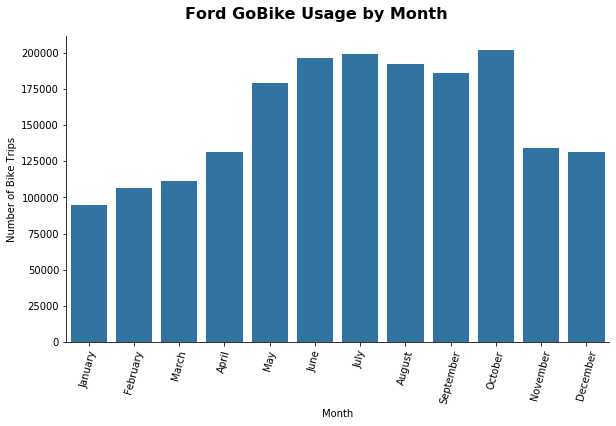

In [80]:
# Monthly usage of the Ford Go Bike system

no_color = sns.color_palette()[0]
graph = sns.catplot(data = df_clean, x = 'start_time_month', kind = 'count', color = no_color, aspect = 1.7);
graph.set_axis_labels('Month', 'Number of Bike Trips'),
graph.fig.suptitle('Ford GoBike Usage by Month', y = 1.05, fontsize = 16, fontweight = 'bold');
graph.set_xticklabels(rotation=75);

> **Observation:** The most popular times to use the Ford Go Bike sharing system is Summer season from June to October. October is most popular month followed by july. And in Winter season the use of Ford Go Bike sharing system is decreased.

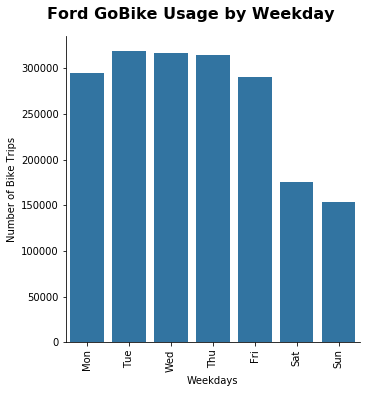

In [82]:
# Weekly usage of the Ford Go bike system

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
graph = sns.catplot(data=df_clean, x='start_time_weekday', kind='count', color = no_color, order = weekday)
graph.set_axis_labels('Weekdays', 'Number of Bike Trips')
graph.fig.suptitle('Ford GoBike Usage by Weekday', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=90);

> **Observation:** Tuesdays followed by Wednesdays and Thursday seem to be the most popular days for using the bike sharing system. Sunday is least popular days in the week, we can conclude that, Ford bike share system is used primarily for commuting purposes during working days.

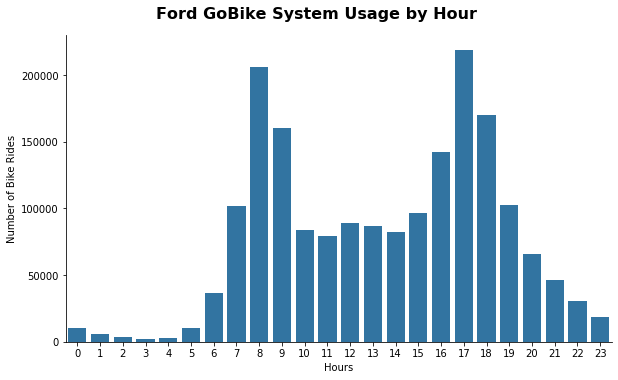

In [84]:
# Hourly usage of the Ford Go Bike System

graph = sns.catplot(data = df_cleaned, x='start_time_hour', kind='count', color = no_color, aspect = 1.7)
graph.set_axis_labels('Hours', 'Number of Bike Rides')
graph.fig.suptitle('Ford GoBike System Usage by Hour', y=1.05, fontsize=16, fontweight='bold');

> **Observation:** This Observation also shows that the use of Ford go bike is used only in working hours.The distribution is bimodal,here we can se that he pick time for using Ford Go Bike is between 8-9 AM and 5-6 PM.

<a id='Bivariate Exploration'></a>

## B) Bivariate Exploration

In [85]:
# calculating % split for the user type
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df_clean['bike_id'].count()
subscriber_proportion = subscriber / df_clean['bike_id'].count()

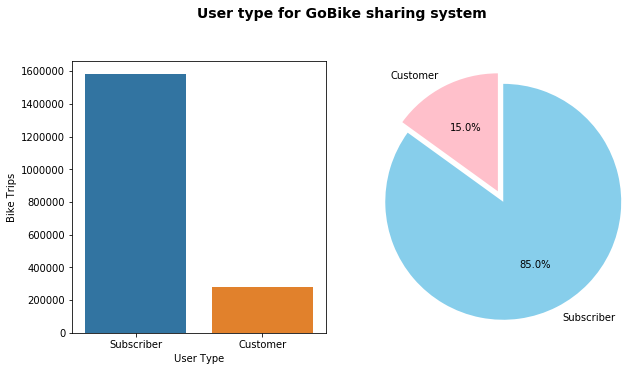

In [94]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="user_type", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('Bike Trips')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['pink', 'skyblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')

plt.suptitle('User type for GoBike sharing system', y=1.03, fontsize=14, fontweight='bold');

> **Observation:** The bike sharing system is mainly used by subscribers (85%) than ocassional riders (15%).

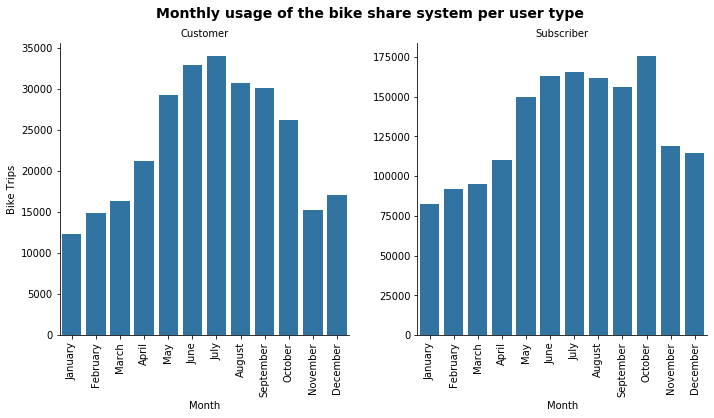

In [97]:
# monthly usege of the bike sharing system by user type
g = sns.catplot(data=df_clean, x='start_time_month', col="user_type", kind='count', sharey = False,
            color = no_color)
g.set_axis_labels("Month", "Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');
g.set_xticklabels(rotation=90);

**Observation:**

> Winter months are the worst for the bike sharing system for both groups what can be determined by the harsher weather.

>For **Customers**, the bike renting is high in demand around summertime, reaching its peak in July. Customers are most probably occasional reiders or tourist coming to visit the Bay Area. For **Subscribers**, the highest demand is from May till October, reaching it's peak in October. Customers are most probably regular riders using bikes for a daily commute.

>If we see overall senerio then we can see that from May to October average demand is equal for both Customers and subscribers.

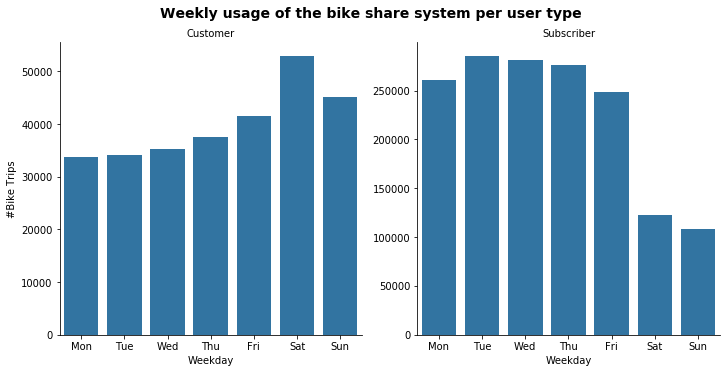

In [99]:
# weekday usege of the bike sharing system per user type
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_weekday', col="user_type", kind='count', sharey = False,
            color = no_color, order = weekday)
g.set_axis_labels("Weekday", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

**Observation:** >There is totally a different trend in Customer and Subscriber in weekdays.As mentioned above customers are most probably occasional riders and tourist who use the bike sharing system on holiday or weekend trips. On the other hand, subscribers are most probably daily work/school commuters who use the system within a week.

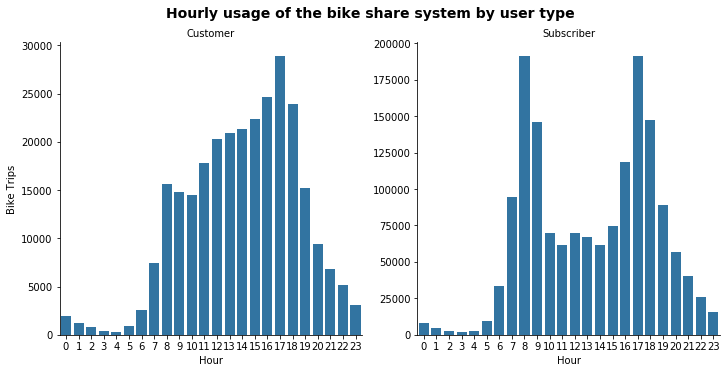

In [102]:
# hourly usege of the bike sharing system per user type
g = sns.catplot(data=df_clean, x='start_time_hour', col="user_type", kind='count', sharey = False,color = no_color)
g.set_axis_labels("Hour", "Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system by user type', y=1.03, fontsize=14, fontweight='semibold');

**Observation:** There is a different trend between customers and subscribers, here we can see that the **Customers** use bikes from 7AM to 8PM but mainly active between 4-6PM. but the **Subscribers** mainly use bike between 7-9AM and then between 4-6PM.

<a id='Multivariate Exploration'></a>
## C) Multivariate Exploration

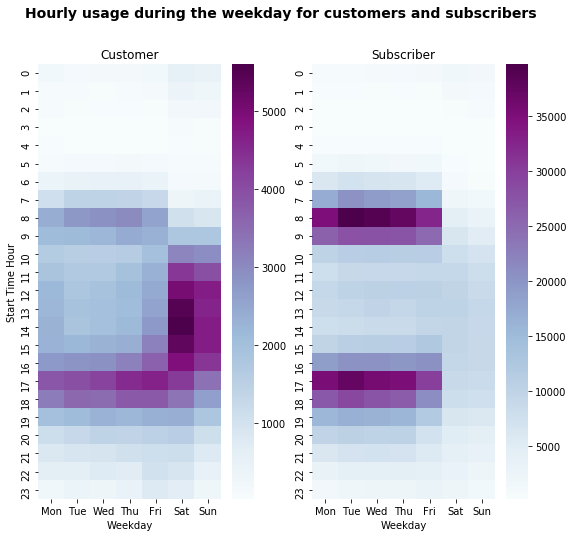

In [110]:
# Weekday order
df_clean['start_time_weekday'] = pd.Categorical(df_clean['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_customer, cmap="BuPu")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_subscriber, cmap="BuPu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

**Observation**


**Customers use the bike sharing system more often on weekends:**
* weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Fridays around 5pm
* weekends: most bike rides happen between 10am - 8pm with the peak on Saturdays around 2pm


**Subscribers use the bike sharing system mainly on weekdays:**
* weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Tuesdays around 8am
* weekends: bikes are still rented but there is a significant drop in numbers of rented bikes throughout the entire weekends

<a id='Conclusions'></a>
# Conclusion

There are two types of clients using the system: Subscribers and Customers. Subscribers are primarily daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm, and, occasionally around lunch time. Customers are usually tourists or occassional riders who use the system mainly on weekends to explore the Bay Area.

Renting a bike from theFord GoBike System is a fantastic (healthy and environmentally friendly) way of moving around in the city, both for enjoyment and work. 

**Benefits:**

* Environmentally friendly, budget friendly, and lifetsyle friendly.
* Subscribers (i.e. daily commuters) benefit from a health commuting choice
* Customers (i.e. tourists, students, etc.) have a sustainable, yet flexible option for touring the city.
* Affordable and convenient transportation for the people of all socioeconomic classes

> **After doing my Primary data gathering and Cleaning  , I find that in my dataset their is some missing information like User_AGE, User_Gender etc**
> **Then i cross examine and get , the updated dataset doesn't consists of age or gender**